# Proejct 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">5 Minutes</span>
* A2. Gradient Orientation: <span style="color:red;">5 Minutes</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">2.5 Hours</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">1 Hour</span>
* B. Hough Transform (Circles):  <span style="color:red;">18 Hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

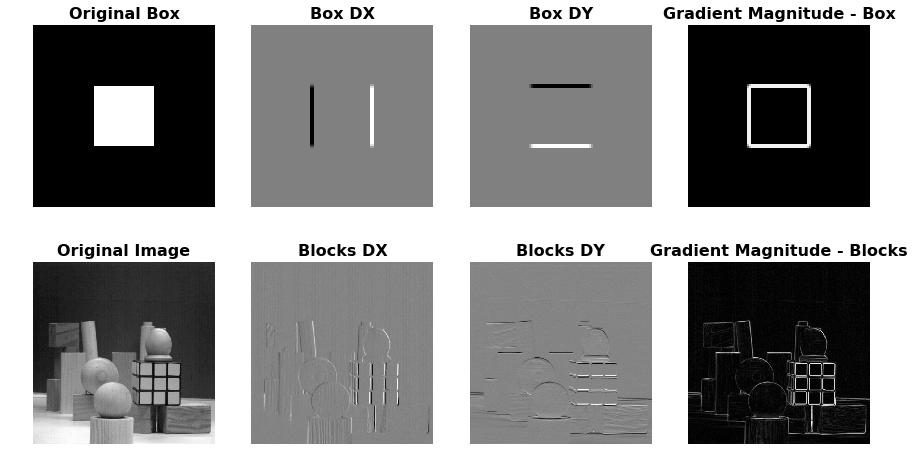

In [2]:
# Part 1. Compute the Gradient Magnitude
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import cv2
import imageio

plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

# Read in the Image 
blocks = plt.imread("blocks.png") * 255
box = plt.imread("2D_White_Box.png") * 255

def compute_gradient(image):
    # Sobel Kernel for dx and dy
    dx_kernel = 1/8.*np.array([[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]],dtype=np.float32)
    dy_kernel = 1/8.*np.array([[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]],dtype=np.float32)
    #Apply the kernel to the image
    dx_img = cv2.filter2D(image,-1,dx_kernel)
    dy_img = cv2.filter2D(image,-1,dy_kernel)
    # Get the gradient magnitude of the image
    gradient_magnitude = np.sqrt(dx_img**2 + dy_img**2)
    return gradient_magnitude, dx_img, dy_img

gradient_box, dx_box, dy_box = compute_gradient(box)
gradient_blocks, dx_blocks, dy_blocks = compute_gradient(blocks)

# Show your results on the blocks image
# Show the original image, the dx and dy of the image and the Gradient Magnitude Image
plt.subplot(2,4,1)
plt.axis("off")
plt.title("Original Box")
plt.imshow(box,cmap="gray")

plt.subplot(2,4,2)
plt.axis("off")
plt.title("Box DX")
plt.imshow(dx_box, cmap="gray")

plt.subplot(2,4,3)
plt.axis("off")
plt.title("Box DY")
plt.imshow(dy_box, cmap="gray")

plt.subplot(2,4,4)
plt.axis("off")
plt.title("Gradient Magnitude - Box")
plt.imshow(gradient_box,cmap="gray")

plt.subplot(2,4,5)
plt.axis("off")
plt.title("Original Image")
plt.imshow(blocks,cmap="gray")

plt.subplot(2,4,6)
plt.axis("off")
plt.title("Blocks DX")
plt.imshow(dx_blocks, cmap="gray")

plt.subplot(2,4,7)
plt.axis("off")
plt.title("Blocks DY")
plt.imshow(dy_blocks, cmap="gray")

plt.subplot(2,4,8)
plt.axis("off")
plt.title("Gradient Magnitude - Blocks")
plt.imshow(gradient_blocks,cmap = "gray")
plt.show()

<p>This approach seems to work pretty well. It picks up on almost all the edges and doesn't get too much of the noise</p>

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

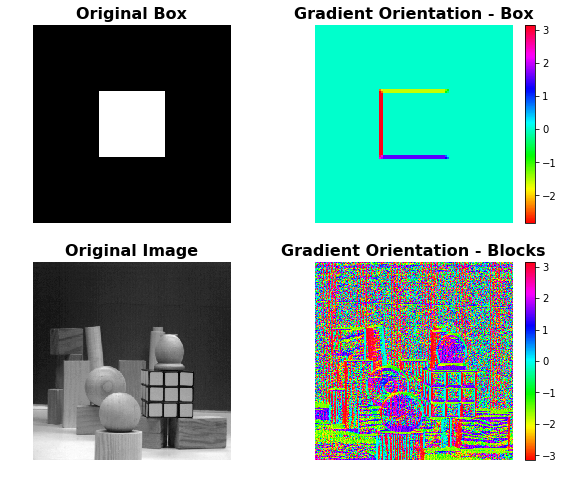

In [3]:
# Part 2. Compute the Gradient Orientation
# Use arctangent to find the gradient orientation
plt.rcParams['figure.figsize'] = [10,8]
def compute_orientation(image):
    # Sobel Kernel for dx and dy
    dx_kernel = 1/8.*np.array([[1.,0.,-1.],[2.,0.,-2.],[1.,0.,-1.]],dtype=np.float32)
    dy_kernel = 1/8.*np.array([[1.,2.,1.],[0.,0.,0.],[-1.,-2.,-1.]],dtype=np.float32)
    #Apply the kernel to the image
    dx_img = cv2.filter2D(image,-1,dx_kernel)
    dy_img = cv2.filter2D(image,-1,dy_kernel)
    #Compute the gradient orientation
    gradient_orientation = np.arctan2(dy_img, dx_img)
    return gradient_orientation

orientation_box = compute_orientation(box)
orientation_blocks = compute_orientation(blocks)

# Show your results on the blocks image
# Display results of the gradient orientation image
plt.subplot(2,2,1)
plt.axis("off")
plt.title("Original Box")
plt.imshow(box,cmap="gray")

plt.subplot(2,2,2)
plt.axis("off")
plt.title("Gradient Orientation - Box")
plt.imshow(orientation_box,cmap="hsv")
plt.colorbar()

plt.subplot(2,2,3)
plt.axis("off")
plt.title("Original Image")
plt.imshow(blocks,cmap="gray")

plt.subplot(2,2,4)
plt.axis("off")
plt.title("Gradient Orientation - Blocks")
plt.imshow(orientation_blocks,cmap = "hsv")
plt.colorbar()
plt.show()

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



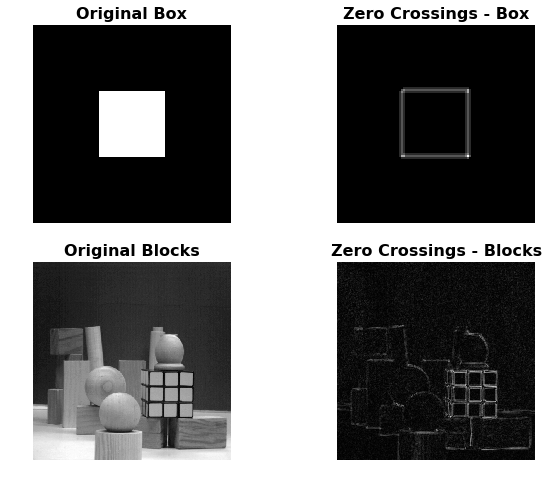

In [4]:
# Part 3. Find the Zero Crossings
plt.rcParams['figure.figsize'] = [10,8]
def compute_zero_crossings(image, filtering=True):
    # Create the Laplacian Kernel:
    laplacian = np.array([[0,1,0], [1,-4,1], [0,1,0]],dtype = np.float32)
    #Optionally blur the image to clean up the noise a bit:
    if filtering:
        filtered_image = cv2.blur(image,(3,3))
    else:
        filtered_image = image
    # Pass the image through the Laplacian Filter
    zero_crossings = cv2.filter2D(filtered_image,-1,laplacian)
    computed_zero_crossings = np.zeros_like(zero_crossings)
    
    #Find the zeroCrossings by adding together a shifted version of the image to find the magnitude of the zero crossings
    horizontal = np.abs(zero_crossings[:,:-1] - zero_crossings[:,1:])
    vertical = np.abs(zero_crossings[1:,:] - zero_crossings[:-1,:])
    horiz_zero = np.hstack((horizontal,np.vstack(np.zeros_like(zero_crossings[:,0]))))
    vert_zero = np.vstack((vertical, np.zeros_like(zero_crossings[0,:])))
    computed_zero_crossings = horiz_zero + vert_zero
    
    return computed_zero_crossings

# Compute the zero crossings by applying the laplacian
boxZC = compute_zero_crossings(box, False)
blocksZC = compute_zero_crossings(blocks)

# Show the results on blocks image
plt.subplot(2,2,1)
plt.axis("off")
plt.title("Original Box")
plt.imshow(box,cmap="gray")

plt.subplot(2,2,2)
plt.axis("off")
plt.title("Zero Crossings - Box")
plt.imshow(boxZC,cmap="gray")

plt.subplot(2,2,3)
plt.axis("off")
plt.title("Original Blocks")
plt.imshow(blocks,cmap="gray")

plt.subplot(2,2,4)
plt.axis("off")
plt.title("Zero Crossings - Blocks")
plt.imshow(blocksZC,cmap = "gray")
plt.show()

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


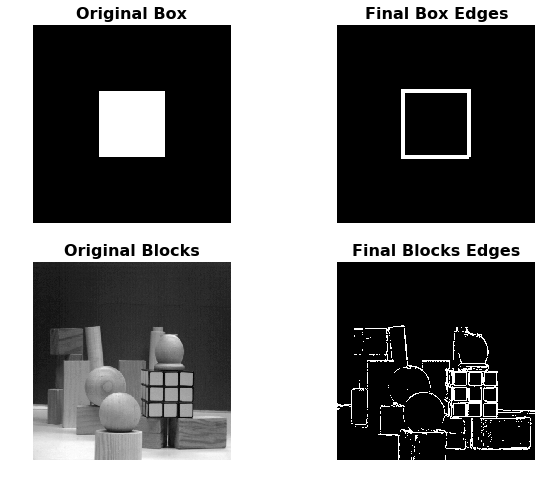

In [5]:
# Part 4. Final Solution
# Combine the zero_crossings and gradient_magnitude image and use a threshold to get a final image
plt.rcParams['figure.figsize'] = [10,8]
def compute_final(image,filtering=True):
    """Takes an image and computes the image gradient along with its zero_crossings to combine and create a final image"""
    height = image.shape[0]
    width = image.shape[1]
    laplacian = compute_zero_crossings(image,filtering)
    gradient, dx_img, dy_img = compute_gradient(image)
    final_image = np.zeros_like(image)
    threshold = 10
    for y in range(height):
        for x in range(width):
            if gradient[y,x] > threshold and laplacian[y,x] > 4:
                final_image[y,x] = 255
            else:
                final_image[y,x] = 0
    return final_image

#Compute the combined image for the box and the blocks
final_box = compute_final(box,False)
final_blocks = compute_final(blocks)

# Show the results on box and blocks image
plt.subplot(2,2,1)
plt.axis("off")
plt.title("Original Box")
plt.imshow(box,cmap="gray")

plt.subplot(2,2,2)
plt.axis("off")
plt.title("Final Box Edges")
plt.imshow(final_box,cmap="gray")

plt.subplot(2,2,3)
plt.axis("off")
plt.title("Original Blocks")
plt.imshow(blocks,cmap="gray")

plt.subplot(2,2,4)
plt.axis("off")
plt.title("Final Blocks Edges")
plt.imshow(final_blocks,cmap = "gray")
plt.show()

##### Part A: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>
<p>We can see the various stages of the process of edge detection. In computing the gradient magnitude of the images, I was surprised how well it did without and blurring and without any thresholding. It seemed to pick out most everything.</p>
<p> When plotting the orientation I decided to plot the wood blocks one in hsv color scheme to more adequately represent the different directions of the gradient of the image, but left the box the same because there isn't much change going on.</p>
   <p> Working to find the zero crossings was a lot harder than I thought it would be. I decided to manually go through each pixel and verify different changes near its neighbors to see if it was indeed a zero crossing by adding offset laplacians together, and try different thresholds to map the values to adequately represent crossings.</p>
    <p>Finally, on the combined image I was able to pick out almost all of the edges in the blocks image, and even get some detail in the wood, which I thought is pretty cool that it picked up on that. My pixel values were pretty low in the gradient image (between 0 and 73), so I played around with lots of different thresholds and ended up with 10 which I think I found a good balance between getting all the edges, and keeping some of the finer details. Going higher removes the sharp edges, and going lower allows more random noise in the image.</p>
    <p>I was wondering how code quality will affect our grade? Are we expected to comment functions and code, or just expected to produce the right output? The assignment was also vague on what we were supposed to do with the Laplacian. Whether we were supposed to plot that, or the zero_crossings, or both.</p>

<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [6]:
# Part B - Hough Transform - code below
import copy

def color2gray(image):
    """Converts a color image to grayscale,"""
    result = image[:,:,0] * 0.299 + image[:,:,1] *  0.587 + image[:,:,2] * 0.114
    return result

def make_stamp(radius):
    """Creates a circle of the specified size radius to stamp onto an image."""
    stamp = np.zeros((radius*2, radius*2))
    for t in range(360): 
        a = radius - int(radius * np.cos(t * np.pi / 180))
        b = radius - int(radius * np.sin(t * np.pi / 180))
        stamp[int(b)-1,int(a)-1] = 1
    return stamp

def vote(image):
    """Takes an image of edges and votes on each edge point with a circle on each of the the 3 different accumulators"""
    height = image.shape[0]
    width = image.shape[1]
    #Populate Stamps for each circle radius
    stamp32 = make_stamp(16)
    stamp64 = make_stamp(32)
    stamp96 = make_stamp(48)
    #Populate the accumulator array
    for y in range(height):
        for x in range(width):
            #For each edge point detected, vote in a circle around it
            if image[y,x] == 255:
                for r in range(3):
                    b = y + (r+1)*16
                    a = x + (r+1)*16                    
                    if r == 0:
                        accumulator32[b-16:b+16, a-16:a+16] += stamp32
                    if r == 1:
                        accumulator64[b-32:b+32, a-32:a+32] += stamp64
                    if r ==2:
                        accumulator96[b-48:b+48, a-48:a+48] += stamp96 


def find_local_maxima(accumulator,radius):
    """Uses the overall mean of the image, and a threshold to find the maximal points of the given accumulator, 
    and suppresses non-local maxima with those thresholds"""
    centers = []
    new_accumulator = copy.deepcopy(accumulator)
    center_accumulator = np.zeros_like(accumulator)
    #Find the biggest value in the accumulator, and grab the associated center coordinates
    max_val = np.max(new_accumulator)
    cy,cx = np.unravel_index(np.argmax(new_accumulator), new_accumulator.shape)
    #Compute the overall mean and the threshold we want the centers to be brighter than
    overall_mean = np.mean(new_accumulator)
    threshold = int(np.mean(new_accumulator) * 2 * 2.85)
    #Compute the Centers
    while max_val > threshold:
        cy,cx = np.unravel_index(np.argmax(new_accumulator), new_accumulator.shape)
        #Check if its a global max, and also a local max by examining different neighborhoods of the possible center
        if max_val > overall_mean*4 and (np.abs(np.mean(accumulator[cy-5:cy+6, cx-5:cx+6]) - np.mean(accumulator[cy-3:cy+4, cx-3:cx+4])) > 4.1):
            centers.append((cy,cx,new_accumulator[cx,cy]))
            center_accumulator[cy-5:cy+6, cx-5:cx+6] = accumulator[cy-5:cy+6, cx-5:cx+6]
        new_accumulator[cy-5:cy+6, cx-5:cx+6] = 0
        max_val = np.max(new_accumulator)
    
    #Create an image drawing circles around the centers
    max_votes_image = np.zeros_like(new_accumulator)
    for point in centers:
#         max_votes_image[point[0]-radius:point[0]+radius,point[1] -radius:point[1] + radius] += make_stamp(radius)
        cv2.circle(max_votes_image, (point[1],point[0]),radius,255,2) #Decided to use the cv2 circle drawer here because it can vary width. 
    return centers, max_votes_image, center_accumulator

In [7]:
#Read in the circle and change it to RGB Format
in_file = "circles.png"
# in_file = "simplecircle.png"
circle = cv2.imread(in_file)
circle = cv2.cvtColor(circle, cv2.COLOR_BGR2RGB)
#Apply a Median blur and then a Gaussian Blur to reduce noise
circle = cv2.GaussianBlur(cv2.medianBlur(circle,3),(3,3),0)

# Detect edges to find desired feature points
# my_red = compute_final(color2gray(circle)) Compare my previous function to the Canny Edge Detector's edges
circle_edges = cv2.Canny(circle,0,255)

#Build the Accumulators with extra padding to be able to vote outside the image's bounds
accumulator32 = np.zeros((circle_edges.shape[0] + 2*16,circle_edges.shape[1]+ 2*16))
accumulator64 = np.zeros((circle_edges.shape[0] + 2*32,circle_edges.shape[1] + 2*32))
accumulator96 = np.zeros((circle_edges.shape[0] + 2*48,circle_edges.shape[1] + 2*48))  

# Perform voting within our accumulators for each feature point:
vote(circle_edges)

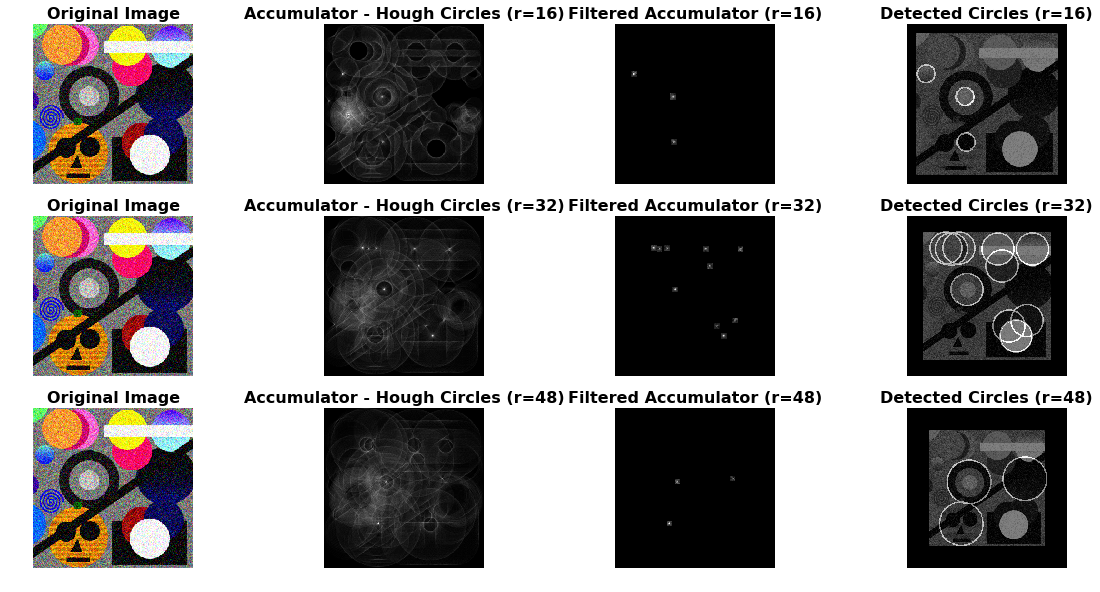

In [8]:
#Find Maxima in the Accumulators:
a32,small_circles, filtered_accumulator32 = find_local_maxima(accumulator32,16)
a64,medium_circles, filtered_accumulator64 = find_local_maxima(accumulator64,32)
a96,large_circles, filtered_accumulator96 = find_local_maxima(accumulator96,48)
#Make the labels bright
small_circles[small_circles > 0] = 255
medium_circles[medium_circles > 0] = 255
large_circles[large_circles > 0] = 255
#Plot the accumulator arrays and their circles on top of a grayscale of the image
original_image = cv2.cvtColor(cv2.imread(in_file),cv2.COLOR_BGR2RGB)
gray_circles = color2gray(cv2.imread(in_file))
small_circles[16:-16,16:-16] += gray_circles
medium_circles[32:-32,32:-32] += gray_circles
large_circles[48:-48,48:-48] += gray_circles

#Plot the Original Image, the Accumulator, Filtered Accumulator and Detected Circles for each Radius
plt.rcParams['figure.figsize'] = [20,10]

plt.subplot(3,4,1)
plt.title("Original Image")
plt.axis("off")
plt.imshow(original_image,cmap="gray")

plt.subplot(3,4,2)
plt.title("Accumulator - Hough Circles (r=16)")
plt.axis("off")
plt.imshow(accumulator32,cmap="gray")

plt.subplot(3,4,3)
plt.title("Filtered Accumulator (r=16)")
plt.axis("off")
plt.imshow(filtered_accumulator32,cmap="gray")

plt.subplot(3,4,4)
plt.title("Detected Circles (r=16)")
plt.axis("off")
plt.imshow(small_circles,cmap="gray")

plt.subplot(3,4,5)
plt.title("Original Image")
plt.axis("off")
plt.imshow(original_image,cmap="gray")

plt.subplot(3,4,6)
plt.title("Accumulator - Hough Circles (r=32)")
plt.axis("off")
plt.imshow(accumulator64,cmap="gray")

plt.subplot(3,4,7)
plt.title("Filtered Accumulator (r=32)")
plt.axis("off")
plt.imshow(filtered_accumulator64,cmap="gray")

plt.subplot(3,4,8)
plt.title("Detected Circles (r=32)")
plt.axis("off")
plt.imshow(medium_circles,cmap="gray")

plt.subplot(3,4,9)
plt.title("Original Image")
plt.axis("off")
plt.imshow(original_image,cmap="gray")

plt.subplot(3,4,10)
plt.title("Accumulator - Hough Circles (r=48)")
plt.axis("off")
plt.imshow(accumulator96,cmap="gray")

plt.subplot(3,4,11)
plt.title("Filtered Accumulator (r=48)")
plt.axis("off")
plt.imshow(filtered_accumulator96,cmap="gray")

plt.subplot(3,4,12)
plt.title("Detected Circles (r=48)")
plt.axis("off")
plt.imshow(large_circles,cmap="gray")

plt.show()


##### Part B: Write-up

<span style="color:red">Please describe your results here and any questions, etc. above.</span>
<p>In detecting circles, I spent close to 18 hours working on this part of the project. I think part of it is because I'm new to most parts of image processing and wanted to learn how things were working. However, a lot of my time was spent trying to suppress the spiral while being able to pick out the centers of other circles for different sized radii. I wanted to have a threshold that would work for all sizes while not misidentifying circles. </p>

<p> The approach that I took was to use the Hough Transform on the image of edges. I used the Canny edge detector to detect the edges of the image, and then created a function to stamp a circle at each edge point so as to "vote" in a circle around the edges. That way the centers of the circles would appear brighter than other noise, and I'd be able to pick them up. Initially, I was able to pick out most of the medium-sized circles and all 3 large circles pretty quick with just a global threshold. However what gave me the most trouble was figuring out how to suppress the spiral in the small circle radius accumulator. I eventually found a method that worked for me to suppress the spiral by looking at a neighborhood around the maximal brightness point and comparing the neighborhood's mean to the mean of a smaller neighborhood. Though the neighborhood sizes seemed to be working fine, it took some fine tuning to find a threshold value to compare these measures that would work for all three radii sizes.</p>

<p>Using this method of non-maximal suppression, I was able to remove all false negatives from the images, and identify all the large circles, all the full medium circles, and all but one small circle. I missed the two medium circles that were partial circles, and I missed the partial small circle and second small eye of the pumpkin. However, I feel pretty good about the work I have done because I was able to remove all misidentification of circles, and only missed one small circle and three partial circles. I decided to use the cv2.Circle function to draw the final circles, even though I used my circle function for voting, because it has the option to adjust thickness and drew better outlines than my stamp function did. If I had more time, I would like to implement voting by weighting the direction of the gradient, and also weighting votes for partial circles more by using trigonometry to figure out the portion of the circle in the image and adjusting accordingly. I learned a lot about the structure of images and the background behind what an edge and an image really are, and how we can manipulate that to our advantage. It was also really cool to see the common applications of math while doing this project.</p>